https://github.com/gzr2017/ImageProcessing100Wen/blob/master/Question_11_20/README.md

## 11. 均值滤波器
使用$3\times3$的均值滤波器来进行滤波吧！

均值滤波器使用网格内像素的平均值。

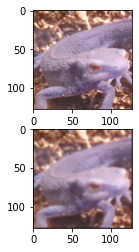

In [3]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def mean_filter(bgr_img, K_size=3):
    # zero padding
    KH, KW = K_size, K_size
    H, W, C = bgr_img.shape
    
    n_H_pad = KH // 2
    n_W_pad = KW // 2

    pad = np.zeros([H+n_H_pad*2, W+n_W_pad*2, C], dtype=bgr_img.dtype)
    pad[n_H_pad:n_H_pad+H, n_W_pad:n_W_pad+W] = bgr_img.copy()

    # mean filter
    out = np.zeros_like(bgr_img)
    for i in range(H):
        for j in range(W):
            out[i, j] = np.mean(pad[i:i+KH, j:j+KW], axis=(0,1))
    return out


img = cv2.imread("../Question_11_20/imori.jpg")
img2 = mean_filter(img)

plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(img2)
plt.show()

## 12. Motion Filter
使用$3\times3$的Motion Filter来进行滤波吧。

Motion Filter取对角线方向的像素的平均值，像下式这样定义： $$ \left[ \begin{matrix} \frac{1}{3}&0&0\\ 0&\frac{1}{3}&0\\ 0 & 0& \frac{1}{3} \end{matrix} \right] $$

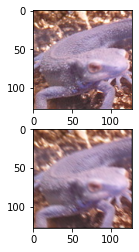

In [8]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def motion_filter(bgr_img, K_size=3):
    # zero padding
    KH, KW = K_size, K_size
    H, W, C = bgr_img.shape
    
    n_H_pad = KH // 2
    n_W_pad = KW // 2

    pad = np.zeros([H+n_H_pad*2, W+n_W_pad*2, C], dtype=bgr_img.dtype)
    pad[n_H_pad:n_H_pad+H, n_W_pad:n_W_pad+W] = bgr_img.copy()

    # motion filter
    K = np.diag([1.0/K_size]*K_size)
    K3 = np.tile(np.expand_dims(K, axis=2), [1,1,C])
    out = np.zeros_like(bgr_img)
    for i in range(H):
        for j in range(W):
            out[i, j] = np.sum(pad[i:i+KH, j:j+KW]*K3, axis=(0,1))
    return out


img = cv2.imread("../Question_11_20/imori.jpg")
img2 = motion_filter(img)

plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(img2)
plt.show()

## 13. MAX-MIN滤波器
使用MAX-MIN滤波器来进行滤波吧。

MAX-MIN滤波器使用网格内像素的最大值和最小值的差值对网格内像素重新赋值。通常用于边缘检测。

边缘检测用于检测图像中的线。像这样提取图像中的信息的操作被称为特征提取。

边缘检测通常在灰度图像上进行。

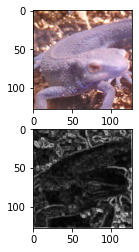

In [13]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def bgr2gray(img):
    blue, green, red = img[...,0], img[...,1], img[...,2]
    gray_img = 0.2126*red + 0.7152*green + 0.0722*blue
    return gray_img.astype('uint8')

def max_min_filter(gray_img, K_size=3):
    # zero padding
    KH, KW = K_size, K_size
    H, W = gray_img.shape
    
    n_H_pad = KH // 2
    n_W_pad = KW // 2

    pad = np.zeros([H+n_H_pad*2, W+n_W_pad*2], dtype=gray_img.dtype)
    pad[n_H_pad:n_H_pad+H, n_W_pad:n_W_pad+W] = gray_img.copy()
    
    # max_min filter
    out = np.zeros_like(gray_img)
    for i in range(H):
        for j in range(W):
            out[i, j] = pad[i:i+KH, j:j+KW].max(axis=(0,1)) - pad[i:i+KH, j:j+KW].min(axis=(0,1))
    return out

img = cv2.imread("../Question_11_20/imori.jpg")
img2 = max_min_filter(bgr2gray(img))

plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(img2, cmap='gray')
plt.show()

## 14. 差分滤波器[^1]（Differential Filter）

[^1]: 原文是“微分フィルタ”，对应的英文应该是“Differential Filter”。考虑到这里处理离散的变量，应该是“差分滤波器”？问题十七：Laplacian滤波器中的“二次微分”没有什么太大歧义就没作处理。

使用$3\times3$的差分滤波器来进行滤波吧。

差分滤波器对图像亮度急剧变化的边缘有提取效果，可以获得邻接像素的差值。

纵向：
$$
K=\left[
\begin{matrix}
0&-1&0\\
0&1&0\\
0&0&0
\end{matrix}
\right]
$$
横向：
$$
K=\left[
\begin{matrix}
0&0&0\\
-1&1&0\\
0&0&0
\end{matrix}
\right]
$$

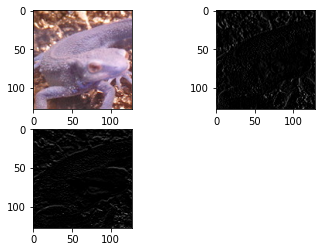

In [30]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def bgr2gray(img):
    img = img.astype("float32")
    blue, green, red = img[...,0], img[...,1], img[...,2]
    gray_img = 0.2126*red + 0.7152*green + 0.0722*blue
    return gray_img.astype('uint8')

def differential_filter(gray_img, orient="h"):
    if orient == "h":
        K = np.array([[0,0,0], [-1,1,0], [0,0,0]], dtype='float32')
    else: # "v"
        K = np.array([[0,-1,0], [0,1,0], [0,0,0]], dtype='float32')
    # zero padding
    KH, KW = K.shape
    H, W = gray_img.shape
    
    n_H_pad = KH // 2
    n_W_pad = KW // 2

    pad = np.zeros([H+n_H_pad*2, W+n_W_pad*2], dtype="float32")
    pad[n_H_pad:n_H_pad+H, n_W_pad:n_W_pad+W] = gray_img.copy().astype("float32")
    
    # differential filter
    out = np.zeros_like(gray_img, dtype='float32')
    for i in range(H):
        for j in range(W):
            out[i, j] = np.sum(pad[i:i+KH, j:j+KW]*K)
    out = np.clip(out, 0, 255).astype('uint8')
    return out


img = cv2.imread("../Question_11_20/imori.jpg")
img2 = differential_filter(bgr2gray(img), orient="h")
img3 = differential_filter(bgr2gray(img), orient="v")
# img2, img3 = different_filter(bgr2gray(img))

plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
plt.imshow(img2, cmap='gray')
plt.subplot(223)
plt.imshow(img3, cmap='gray')
plt.show()

## 15. Sobel滤波器
使用$3\times3$的Sobel滤波器来进行滤波吧。

Sobel滤波器可以提取特定方向（纵向或横向）的边缘，滤波器按下式定义：

纵向： $$ K=\left[ \begin{matrix} 1&2&1\\ 0&0&0\\ -1&-2&-1 \end{matrix} \right] $$ 横向： $$ K=\left[ \begin{matrix} 1&0&-1\\ 2&0&-2\\ 1&0&-1 \end{matrix} \right] $$

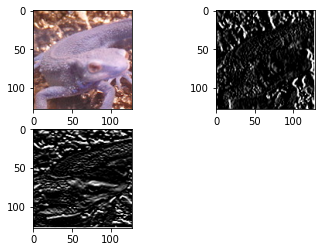

In [33]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def bgr2gray(img):
    img = img.astype("float32")
    blue, green, red = img[...,0], img[...,1], img[...,2]
    gray_img = 0.2126*red + 0.7152*green + 0.0722*blue
    return gray_img.astype('uint8')

def sobel_filter(gray_img, orient="h"):
    if orient == "h":
        K = np.array([[1,0,-1], [2,0,-2], [1,0,-1]], dtype='float32')
    else: # "v"
        K = np.array([[1,2,1], [0,0,0], [-1,-2,-1]], dtype='float32')
    # zero padding
    KH, KW = K.shape
    H, W = gray_img.shape
    
    n_H_pad = KH // 2
    n_W_pad = KW // 2

    pad = np.zeros([H+n_H_pad*2, W+n_W_pad*2], dtype="float32")
    pad[n_H_pad:n_H_pad+H, n_W_pad:n_W_pad+W] = gray_img.copy().astype("float32")
    
    # sobel filter
    out = np.zeros_like(gray_img, dtype='float32')
    for i in range(H):
        for j in range(W):
            out[i, j] = np.sum(pad[i:i+KH, j:j+KW]*K)
    out = np.clip(out, 0, 255).astype('uint8')
    return out


img = cv2.imread("../Question_11_20/imori.jpg")
img2 = sobel_filter(bgr2gray(img), orient="h")
img3 = sobel_filter(bgr2gray(img), orient="v")

plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
plt.imshow(img2, cmap='gray')
plt.subplot(223)
plt.imshow(img3, cmap='gray')
plt.show()

## 16. Prewitt滤波器
使用$3\times3$的Prewitt滤波器来进行滤波吧。

Prewitt滤波器是用于边缘检测的一种滤波器，使用下式定义：

纵向： $$ K=\left[ \begin{matrix} -1&-1&-1\\ 0&0&0\\ 1&1&1 \end{matrix} \right] $$ 横向： $$ K=\left[ \begin{matrix} -1&0&-1\\ -1&0&1\\ -1&0&1 \end{matrix} \right] $$

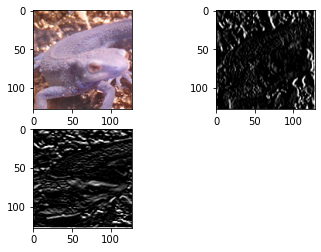

In [34]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def bgr2gray(img):
    img = img.astype("float32")
    blue, green, red = img[...,0], img[...,1], img[...,2]
    gray_img = 0.2126*red + 0.7152*green + 0.0722*blue
    return gray_img.astype('uint8')

def prewitt_filter(gray_img, orient="h"):
    if orient == "h":
        K = np.array([[1,0,-1], [1,0,-1], [1,0,-1]], dtype='float32')
    else: # "v"
        K = np.array([[1,1,1], [0,0,0], [-1,-1,-1]], dtype='float32')
    # zero padding
    KH, KW = K.shape
    H, W = gray_img.shape
    
    n_H_pad = KH // 2
    n_W_pad = KW // 2

    pad = np.zeros([H+n_H_pad*2, W+n_W_pad*2], dtype="float32")
    pad[n_H_pad:n_H_pad+H, n_W_pad:n_W_pad+W] = gray_img.copy().astype("float32")
    
    # prewitt filter
    out = np.zeros_like(gray_img, dtype='float32')
    for i in range(H):
        for j in range(W):
            out[i, j] = np.sum(pad[i:i+KH, j:j+KW]*K)
    out = np.clip(out, 0, 255).astype('uint8')
    return out


img = cv2.imread("../Question_11_20/imori.jpg")
img2 = prewitt_filter(bgr2gray(img), orient="h")
img3 = prewitt_filter(bgr2gray(img), orient="v")

plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
plt.imshow(img2, cmap='gray')
plt.subplot(223)
plt.imshow(img3, cmap='gray')
plt.show()

## 17. Laplacian滤波器

使用Laplacian滤波器来进行滤波吧。

Laplacian滤波器是对图像亮度进行二次微分从而检测边缘的滤波器。由于数字图像是离散的，$x$方向和$y$方向的一次微分分别按照以下式子计算：
$$
I_x(x,y)=\frac{I(x+1,y)-I(x,y)}{(x+1)-x}=I(x+1,y)-I(x,y)\\
I_y(x,y) =\frac{I(x, y+1) - I(x,y)}{(y+1)-y}= I(x, y+1) - I(x,y)
$$
因此二次微分按照以下式子计算：
$$
\begin{align*}
&I_{xx}(x,y) \\
=& \frac{I_x(x,y) - I_x(x-1,y)}{(x+1)-x} \\
=& I_x(x,y) - I_x(x-1,y)\\
         =&[I(x+1, y) - I(x,y)] - [I(x, y) - I(x-1,y)]\\
         =& I(x+1,y) - 2\  I(x,y) + I(x-1,y)
\end{align*}
$$
同理：
$$
I_{yy}(x,y)=I(x,y+1)-2\  I(x,y)+I(x,y-1)
$$
特此，Laplacian 表达式如下：
$$
\begin{align*}
&\nabla^2\ I(x,y)\\
=&I_{xx}(x,y)+I_{yy}(x,y)\\
=&I(x-1,y) + I(x,y-1) - 4 * I(x,y) + I(x+1,y) + I(x,y+1)
\end{align*}
$$
如果把这个式子表示为卷积核是下面这样的：
$$
K=
\left[
\begin{matrix}
0&1&0\\
1&-4&1\\
0&1&0
\end{matrix}
\right]
$$

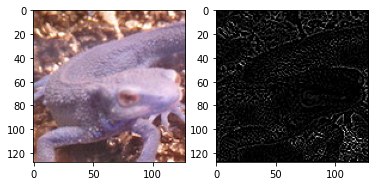

In [39]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def bgr2gray(img):
    img = img.astype("float32")
    blue, green, red = img[...,0], img[...,1], img[...,2]
    gray_img = 0.2126*red + 0.7152*green + 0.0722*blue
    return gray_img.astype('uint8')

def laplacian_filter(gray_img):
    # zero padding
    K = np.array([[0,1,0], [1,-4,1], [0,1,0]], dtype='float32')
    KH, KW = K.shape
    H, W = gray_img.shape
    
    n_H_pad = KH // 2
    n_W_pad = KW // 2

    pad = np.zeros([H+n_H_pad*2, W+n_W_pad*2], dtype="float32")
    pad[n_H_pad:n_H_pad+H, n_W_pad:n_W_pad+W] = gray_img.copy().astype("float32")
    
    # laplacian filter
    out = np.zeros_like(gray_img, dtype='float32')
    for i in range(H):
        for j in range(W):
            out[i, j] = np.sum(pad[i:i+KH, j:j+KW]*K)
    out = np.clip(out, 0, 255).astype('uint8')
    return out


img = cv2.imread("../Question_11_20/imori.jpg")
img2 = laplacian_filter(bgr2gray(img))

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img2, cmap='gray')
plt.show()

## 18. Emboss滤波器
使用Emboss滤波器来进行滤波吧。

Emboss滤波器可以使物体轮廓更加清晰，按照以下式子定义： $$ K= \left[ \begin{matrix} -2&-1&0\\ -1&1&1\\ 0&1&2 \end{matrix} \right] $$

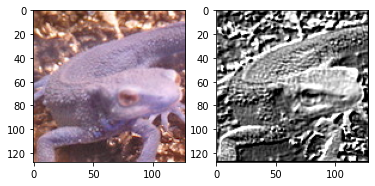

In [43]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def bgr2gray(img):
    img = img.astype("float32")
    blue, green, red = img[...,0], img[...,1], img[...,2]
    gray_img = 0.2126*red + 0.7152*green + 0.0722*blue
    return gray_img.astype('uint8')

def emboss_filter(gray_img):
    # zero padding
    K = np.array([[-2,-1,0], [-1,1,1], [0,1,2]], dtype='float32')
    KH, KW = K.shape
    H, W = gray_img.shape
    
    n_H_pad = KH // 2
    n_W_pad = KW // 2

    pad = np.zeros([H+n_H_pad*2, W+n_W_pad*2], dtype="float32")
    pad[n_H_pad:n_H_pad+H, n_W_pad:n_W_pad+W] = gray_img.copy().astype("float32")
    
    # emboss filter
    out = np.zeros_like(gray_img, dtype='float32')
    for i in range(H):
        for j in range(W):
            out[i, j] = np.sum(pad[i:i+KH, j:j+KW]*K)
    out = np.clip(out, 0, 255).astype('uint8')
    return out


img = cv2.imread("../Question_11_20/imori.jpg")
img2 = emboss_filter(bgr2gray(img))

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img2, cmap='gray')
plt.show()

## 19. LoG滤波器
使用LoG 滤波器，来对imori_noise.jpg检测边缘吧！

LoG即高斯-拉普拉斯（Laplacian of Gaussian）的缩写，使用高斯滤波器使图像平滑化之后再使用拉普拉斯滤波器使图像的轮廓更加清晰。

为了防止拉普拉斯滤波器计算二次微分会使得图像噪声更加明显，所以我们首先使用高斯滤波器来抑制噪声。

LoG 滤波器使用以下式子定义： $$ \text{LoG}(x,y)=\frac{x^2 + y^2 - s^2}{2 \ \pi \ s^6} \ e^{-\frac{x^2+y^2}{2\ s^2}} $$

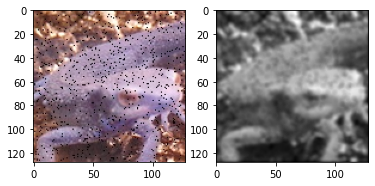

In [46]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def bgr2gray(img):
    img = img.astype("float32")
    blue, green, red = img[...,0], img[...,1], img[...,2]
    gray_img = 0.2126*red + 0.7152*green + 0.0722*blue
    return gray_img.astype('uint8')

def LoG_filter(gray_img, K_size=5, sigma=3):
    # LoG Kernel
    pad = K_size // 2
    K = np.zeros((K_size, K_size), dtype="float32")
    for x in range(-pad, -pad + K_size):
        for y in range(-pad, -pad + K_size):
            K[y + pad, x + pad] = (x ** 2 + y ** 2 - sigma ** 2) * np.exp( -(x ** 2 + y ** 2) / (2 * (sigma ** 2)))
    K /= (2 * np.pi * (sigma ** 6))
    K /= K.sum()

    # zero padding
    KH, KW = K.shape
    H, W = gray_img.shape
    
    n_H_pad = KH // 2
    n_W_pad = KW // 2

    pad = np.zeros([H+n_H_pad*2, W+n_W_pad*2], dtype="float32")
    pad[n_H_pad:n_H_pad+H, n_W_pad:n_W_pad+W] = gray_img.copy().astype("float32")
    
    # LoG filter
    out = np.zeros_like(gray_img, dtype='float32')
    for i in range(H):
        for j in range(W):
            out[i, j] = np.sum(pad[i:i+KH, j:j+KW]*K)
    out = np.clip(out, 0, 255).astype('uint8')
    return out


img = cv2.imread("../Question_11_20/imori_noise.jpg")
img2 = LoG_filter(bgr2gray(img))

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img2, cmap='gray')
plt.show()



## 20. 直方图
使用Matplotlib来绘制imori_dark.jpg的直方图吧！

直方图显示了不同数值的像素出现的次数。在Matplotlib中有hist()函数提供绘制直方图的接口。

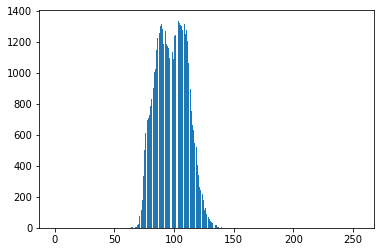

In [51]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("../Question_11_20/imori_dark.jpg")
plt.hist(img.reshape(-1), bins=255, rwidth=0.8, range=(0, 255))
plt.show()
